# Notebook to compute ocean heat content

Call to the reader and retrieve data

In [1]:
import numpy as np
from aqua import Reader
from aqua.graphics import plot_timeseries
from ocean_heat_functions import compute_net_surface_fluxes, plot_time_series

In [ ]:
model="IFS-NEMO"
exp="historical-1990"
source_atm="hourly-hpz10-atm2d"
startdate = "19950101"
enddate = "19950105"
reader_atm = Reader(model=model, exp=exp, source=source_atm, startdate=startdate, enddate=enddate, regrid="r010")
data_atm = reader_atm.retrieve()
data_atm = reader_atm.timmean(data_atm, freq="daily")
data_atm = reader_atm.regrid(data_atm)
data_atm

<xarray.Dataset> Size: 9GB
Dimensions:   (time: 5, lat: 1800, lon: 3600)
Coordinates:
  * time      (time) datetime64[ns] 40B 1995-01-01 1995-01-02 ... 1995-01-05
  * lat       (lat) float64 14kB -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
  * lon       (lon) float64 29kB 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9
Data variables: (12/33)
    tclw      (time, lat, lon) float64 259MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    tciw      (time, lat, lon) float64 259MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    sp        (time, lat, lon) float64 259MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    tcwv      (time, lat, lon) float64 259MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    sd        (time, lat, lon) float64 259MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    chnk      (time, lat, lon) float64 259MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    ...        ...
    mtnlwrf   (time, lat, lon) float64 259MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    metss     (time, lat, lon) float64 259MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    mntss     (time, lat, lon) float64 259MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    mer       (time, lat, lon) float64 259MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    mtdwswrf  (time, lat, lon) float64 259MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    mtpr      (time, lat, lon) float64 259MB dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
Attributes:
    history:  2024-02-23 14:37:37 Dataset retrieved by GSV interface;\n2024-0...

In [ ]:
source_oc="daily-hpz10-oce2d"
reader_oc = Reader(model=model, exp=exp, source=source_oc, startdate=startdate, enddate=enddate, regrid="r010")
data_oc = reader_oc.retrieve()
data_oc = reader_oc.regrid(data_oc)
#data_oc


<xarray.Dataset> Size: 3GB
Dimensions:      (time: 5, lat: 1800, lon: 3600)
Coordinates:
  * time         (time) datetime64[ns] 40B 1995-01-01 1995-01-02 ... 1995-01-05
  * lat          (lat) float64 14kB -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
  * lon          (lon) float64 29kB 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
Data variables: (12/13)
    avg_sithick  (time, lat, lon) float64 259MB dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
    avg_siconc   (time, lat, lon) float64 259MB dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
    avg_siue     (time, lat, lon) float64 259MB dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
    avg_sivn     (time, lat, lon) float64 259MB dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
    avg_sivol    (time, lat, lon) float64 259MB dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
    avg_snvol    (time, lat, lon) float64 259MB dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
    ...           ...
    avg_siy      (time, lat, lon) float64 259MB dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
    avg_sos      (time, lat, lon) float64 259MB dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
    avg_tos      (time, lat, lon) float64 259MB dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
    avg_hc300m   (time, lat, lon) float64 259MB dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
    avg_hc700m   (time, lat, lon) float64 259MB dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
    avg_zos      (time, lat, lon) float64 259MB dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
Attributes:
    history:  2024-02-23 14:39:23 Dataset retrieved by GSV interface;\n2024-0...

Select date range

In [7]:
startdate = "1995-01-01"
enddate = "1995-01-05"
data_atm=data_atm.sel(time=slice(startdate, enddate))
data_oc=data_oc.sel(time=slice(startdate, enddate))

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


Net surface fluxes at the ocean surface are:
mslhf, msnlwrf, msnswrf, msshf
If integrated over the whole ocean surface, they should be equal to the net heat flux at the ocean surface (hfds)
or the heat/sources/sinks in the ocean (hfds - hfss)

In [ ]:
#computes net surface fluxes at the ocean surface including land sea mask
net_surface_fluxes, mask = compute_net_surface_fluxes(data_atm, data_oc)
# compute the time series of the net surface fluxes
net_surface_fluxes = reader_atm.fldmean(net_surface_fluxes)
print(net_surface_fluxes.shape)


(5,)


In [ ]:
# get the heat content of the 700m ocean layer and perform spatial averaging
avg_hc700m = data_oc['avg_hc700m']
avg_hc700m=reader_oc.fldmean(avg_hc700m)
# compute time derivative of the heat content
time_diff = np.diff(avg_hc700m.time.values, axis=0) / np.timedelta64(1, 's')
avg_hc_time_derivative = np.diff(avg_hc700m, axis=0) / time_diff
print(avg_hc_time_derivative.shape)


(4,)


MemoryError: Unable to allocate 1.12 GiB for an array with shape (12582912, 4, 3) and data type float64

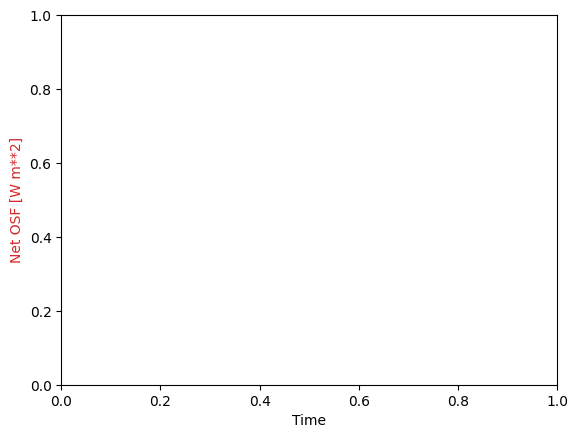

In [ ]:
title_args = {'model': model, 'exp': exp, 'source': source_atm}
plot_time_series(net_surface_fluxes, avg_hc_time_derivative, title_args, var1_label="Net OSF [W m**2]",  var2_label="HC700m time derivative [W m**2]")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<Figure size 1000x500 with 1 Axes>, <Axes: >)

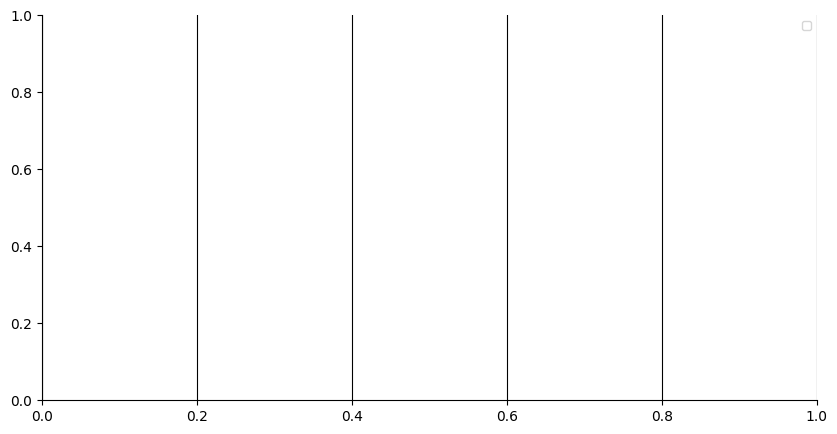

In [9]:
plot_timeseries(monthly_data=[net_surface_fluxes, avg_hc_time_derivative])
                    